# Simulated Annealing Algorithm for 8-Queens Problem

## Overview
This notebook implements the Simulated Annealing algorithm to solve the 8-Queens problem. The algorithm starts with a random solution and gradually improves it by:

1. Starting with a random solution
2. Modifying the state to create a new solution
3. Accepting better solutions immediately
4. Accepting worse solutions with probability based on temperature
5. Gradually reducing temperature to become more selective

The 8-Queens problem involves placing 8 queens on a chess board such that no two queens attack each other.

In [2]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


Initial state: [2, 7, 4, 8, 1, 3, 6, 5]
Initial conflicts: 4


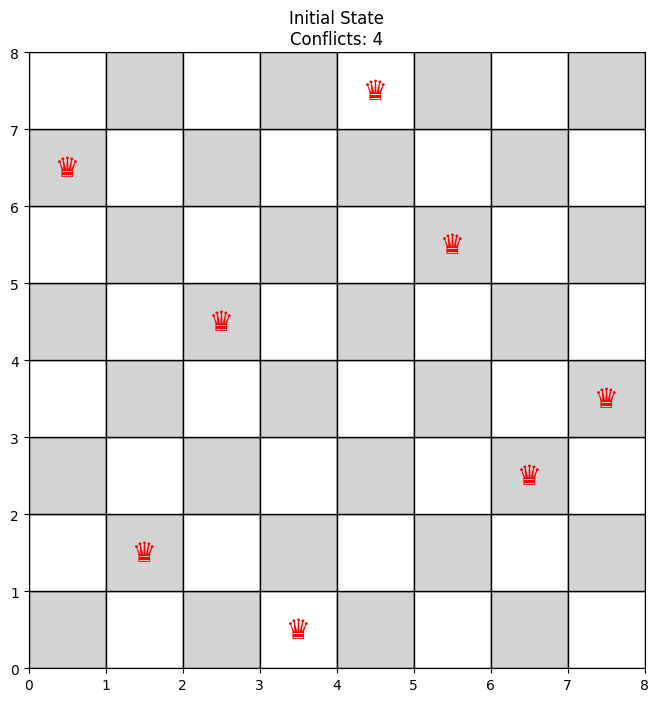

In [3]:
class EightQueens:
    """
    8-Queens problem representation and utility functions.
    State is represented as a list [q1, q2, ..., q8] where qi is the row of the queen in column i.
    """
    
    def __init__(self):
        self.n = 8  # Board size (8x8)
    
    def generate_random_state(self):
        """Generate a random initial state."""
        return [random.randint(1, self.n) for _ in range(self.n)]
    
    def calculate_conflicts(self, state):
        """
        Calculate the number of conflicts (attacking pairs) in the current state.
        Two queens attack each other if they are:
        1. In the same row
        2. On the same diagonal
        """
        conflicts = 0
        
        for i in range(self.n):
            for j in range(i + 1, self.n):
                # Same row conflict
                if state[i] == state[j]:
                    conflicts += 1
                
                # Diagonal conflict: |row1 - row2| = |col1 - col2|
                if abs(state[i] - state[j]) == abs(i - j):
                    conflicts += 1
        
        return conflicts
    
    def get_neighbors(self, state):
        """
        Generate all possible neighboring states by:
        1. Moving each queen to a different row in its column
        2. Swapping positions of two queens
        """
        neighbors = []
        
        # Move each queen to different rows in its column
        for col in range(self.n):
            for new_row in range(1, self.n + 1):
                if new_row != state[col]:  # Don't include current state
                    new_state = state.copy()
                    new_state[col] = new_row
                    neighbors.append(new_state)
        
        return neighbors
    
    def get_random_neighbor(self, state):
        """Get a random neighbor state."""
        neighbors = self.get_neighbors(state)
        return random.choice(neighbors)
    
    def visualize_board(self, state, title="8-Queens Board"):
        """Visualize the current board state."""
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        
        # Create chessboard pattern
        for i in range(self.n):
            for j in range(self.n):
                color = 'lightgray' if (i + j) % 2 == 0 else 'white'
                rect = Rectangle((j, i), 1, 1, facecolor=color, edgecolor='black')
                ax.add_patch(rect)
        
        # Place queens
        for col, row in enumerate(state):
            # Convert to 0-indexed for plotting
            ax.text(col + 0.5, self.n - row + 0.5, '♛', fontsize=20, 
                   ha='center', va='center', color='red', weight='bold')
        
        ax.set_xlim(0, self.n)
        ax.set_ylim(0, self.n)
        ax.set_xticks(range(self.n + 1))
        ax.set_yticks(range(self.n + 1))
        ax.set_aspect('equal')
        ax.set_title(f"{title}\nConflicts: {self.calculate_conflicts(state)}")
        plt.show()

# Test the 8-Queens class
queens = EightQueens()
initial_state = [2, 7, 4, 8, 1, 3, 6, 5]  # Given example
print(f"Initial state: {initial_state}")
print(f"Initial conflicts: {queens.calculate_conflicts(initial_state)}")

# Visualize the initial state
queens.visualize_board(initial_state, "Initial State")

In [4]:
class SimulatedAnnealing:
    """
    Simulated Annealing algorithm implementation for optimization problems.
    """
    
    def __init__(self, initial_temperature=1000, cooling_rate=0.95, min_temperature=0.01):
        self.initial_temperature = initial_temperature
        self.cooling_rate = cooling_rate
        self.min_temperature = min_temperature
        
        # Track progress
        self.temperature_history = []
        self.cost_history = []
        self.acceptance_history = []
    
    def acceptance_probability(self, current_cost, new_cost, temperature):
        """
        Calculate the probability of accepting a worse solution.
        If new_cost < current_cost: Always accept (return 1)
        If new_cost >= current_cost: Accept with probability exp(-(new_cost - current_cost) / temperature)
        """
        if new_cost < current_cost:
            return 1.0
        else:
            return math.exp(-(new_cost - current_cost) / temperature)
    
    def solve(self, problem, initial_state, max_iterations=10000):
        """
        Solve the optimization problem using Simulated Annealing.
        
        Args:
            problem: Problem instance (e.g., EightQueens)
            initial_state: Starting state
            max_iterations: Maximum number of iterations
        
        Returns:
            best_state, best_cost, iteration_data
        """
        current_state = initial_state.copy()
        current_cost = problem.calculate_conflicts(current_state)
        
        best_state = current_state.copy()
        best_cost = current_cost
        
        temperature = self.initial_temperature
        iteration = 0
        accepted_moves = 0
        
        print(f"Starting Simulated Annealing...")
        print(f"Initial state: {current_state}")
        print(f"Initial cost: {current_cost}")
        print(f"Initial temperature: {temperature}")
        print("-" * 50)
        
        while temperature > self.min_temperature and iteration < max_iterations:
            # Get a random neighbor
            new_state = problem.get_random_neighbor(current_state)
            new_cost = problem.calculate_conflicts(new_state)
            
            # Calculate acceptance probability
            accept_prob = self.acceptance_probability(current_cost, new_cost, temperature)
            
            # Decide whether to accept the new state
            if random.random() < accept_prob:
                current_state = new_state
                current_cost = new_cost
                accepted_moves += 1
                
                # Update best solution if better
                if current_cost < best_cost:
                    best_state = current_state.copy()
                    best_cost = current_cost
                    print(f"Iteration {iteration}: New best solution found! Cost: {best_cost}")
            
            # Record history
            self.temperature_history.append(temperature)
            self.cost_history.append(current_cost)
            self.acceptance_history.append(accept_prob)
            
            # Cool down
            temperature *= self.cooling_rate
            iteration += 1
            
            # Print progress occasionally
            if iteration % 1000 == 0:
                acceptance_rate = accepted_moves / iteration * 100
                print(f"Iteration {iteration}: Temp={temperature:.4f}, Cost={current_cost}, "
                      f"Best={best_cost}, Acceptance={acceptance_rate:.1f}%")
            
            # Early termination if optimal solution found
            if best_cost == 0:
                print(f"Optimal solution found at iteration {iteration}!")
                break
        
        print("-" * 50)
        print(f"Final results:")
        print(f"Best state: {best_state}")
        print(f"Best cost: {best_cost}")
        print(f"Total iterations: {iteration}")
        print(f"Final temperature: {temperature}")
        print(f"Total accepted moves: {accepted_moves}")
        print(f"Overall acceptance rate: {accepted_moves/iteration*100:.1f}%")
        
        return best_state, best_cost, {
            'iterations': iteration,
            'temperature_history': self.temperature_history,
            'cost_history': self.cost_history,
            'acceptance_history': self.acceptance_history
        }

# Test the Simulated Annealing algorithm
print("Testing Simulated Annealing on 8-Queens Problem")
print("=" * 60)

Testing Simulated Annealing on 8-Queens Problem


Starting Simulated Annealing...
Initial state: [2, 7, 4, 8, 1, 3, 6, 5]
Initial cost: 4
Initial temperature: 1000
--------------------------------------------------
Iteration 33: New best solution found! Cost: 2
Iteration 1000: Temp=6.6540, Cost=6, Best=2, Acceptance=97.7%
Iteration 1301: New best solution found! Cost: 1
Iteration 2000: Temp=0.0443, Cost=1, Best=1, Acceptance=66.7%
--------------------------------------------------
Final results:
Best state: [4, 2, 7, 2, 6, 8, 1, 5]
Best cost: 1
Total iterations: 2297
Final temperature: 0.009991172861103242
Total accepted moves: 1359
Overall acceptance rate: 59.2%

SOLUTION ANALYSIS
⚠️  Near-optimal solution found with 1 conflicts
Solution state: [4, 2, 7, 2, 6, 8, 1, 5]


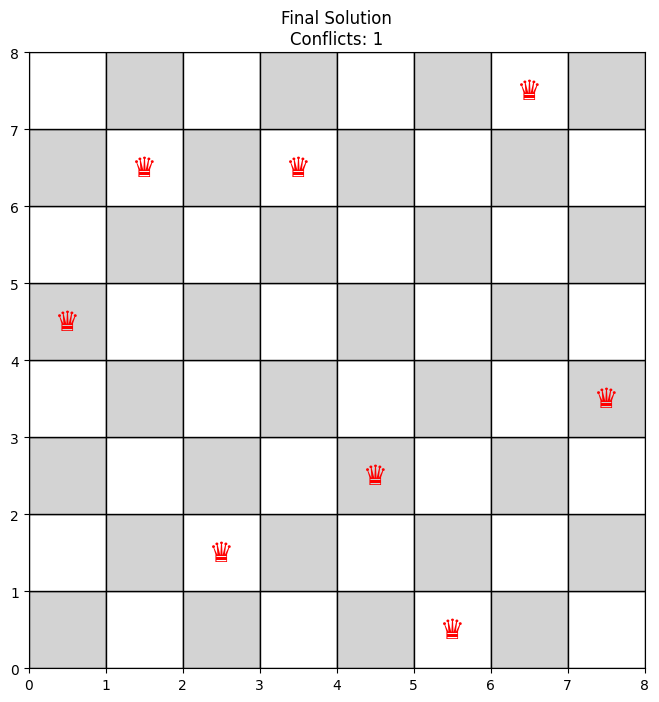

In [5]:
# Solve the 8-Queens problem using Simulated Annealing
queens_problem = EightQueens()
sa_solver = SimulatedAnnealing(
    initial_temperature=1000,
    cooling_rate=0.995,
    min_temperature=0.01
)

# Use the given initial state
initial_state = [2, 7, 4, 8, 1, 3, 6, 5]

# Solve the problem
solution, final_cost, history = sa_solver.solve(queens_problem, initial_state, max_iterations=50000)

print("\n" + "="*60)
print("SOLUTION ANALYSIS")
print("="*60)

if final_cost == 0:
    print("✅ SUCCESS: Found a valid solution with no conflicts!")
else:
    print(f"⚠️  Near-optimal solution found with {final_cost} conflicts")

print(f"Solution state: {solution}")

# Visualize the final solution
queens_problem.visualize_board(solution, "Final Solution")

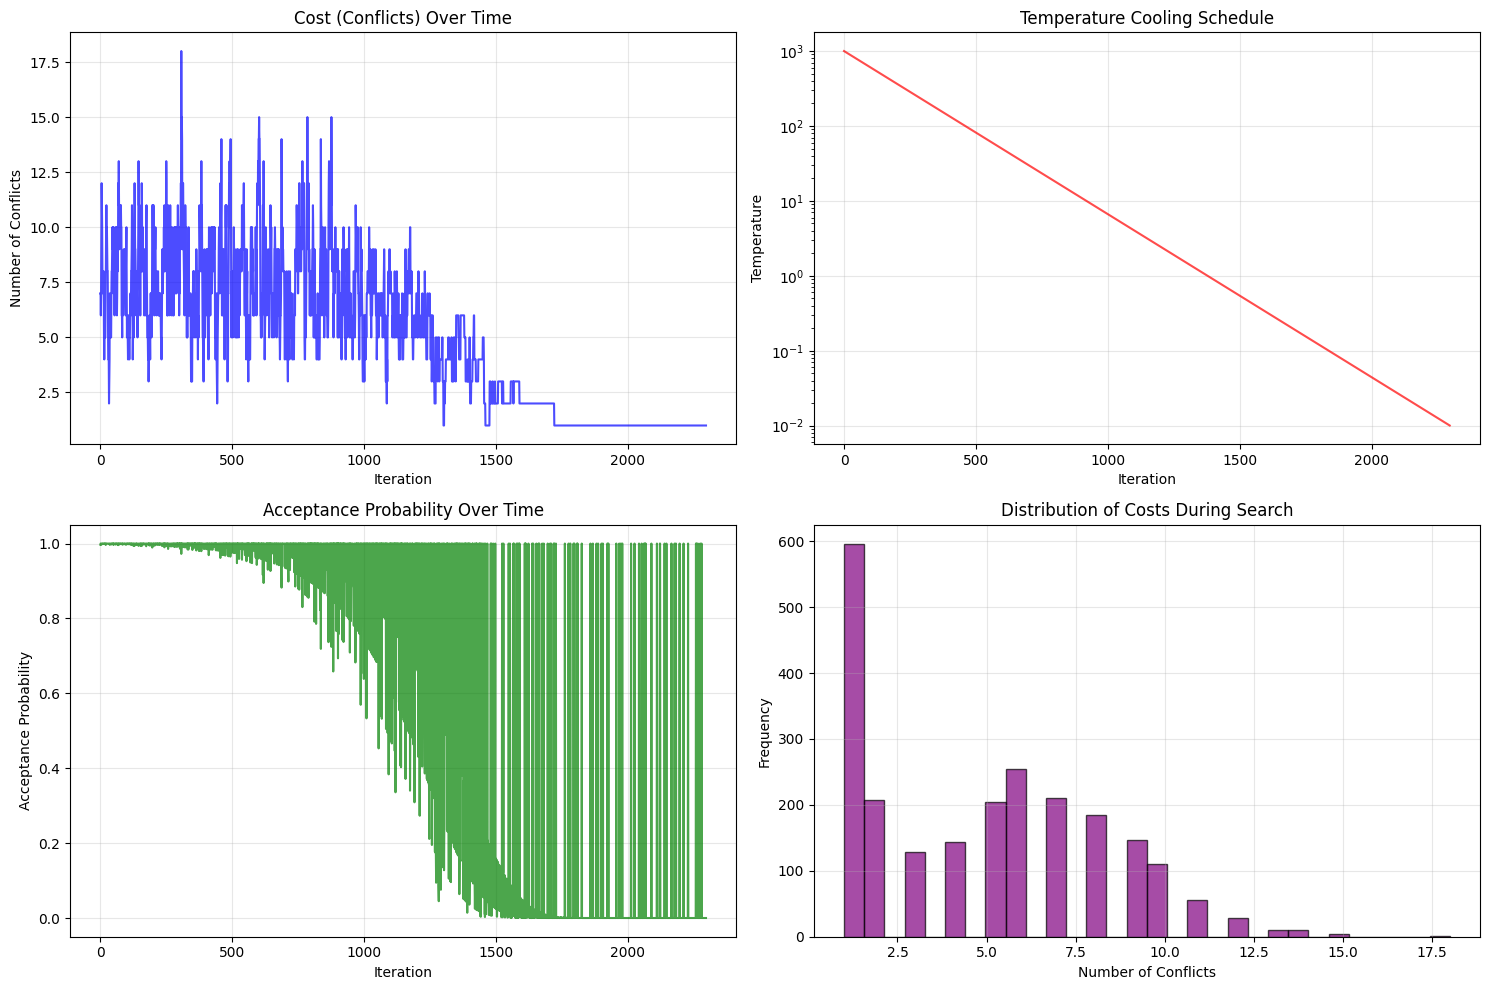

In [6]:
# Visualize the algorithm's progress
def plot_algorithm_progress(history):
    """Plot the progress of the Simulated Annealing algorithm."""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    iterations = range(len(history['cost_history']))
    
    # Plot 1: Cost over time
    ax1.plot(iterations, history['cost_history'], 'b-', alpha=0.7)
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Number of Conflicts')
    ax1.set_title('Cost (Conflicts) Over Time')
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Temperature over time
    ax2.plot(iterations, history['temperature_history'], 'r-', alpha=0.7)
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Temperature')
    ax2.set_title('Temperature Cooling Schedule')
    ax2.set_yscale('log')  # Log scale for better visualization
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Acceptance probability over time
    ax3.plot(iterations, history['acceptance_history'], 'g-', alpha=0.7)
    ax3.set_xlabel('Iteration')
    ax3.set_ylabel('Acceptance Probability')
    ax3.set_title('Acceptance Probability Over Time')
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Distribution of costs
    ax4.hist(history['cost_history'], bins=30, alpha=0.7, color='purple', edgecolor='black')
    ax4.set_xlabel('Number of Conflicts')
    ax4.set_ylabel('Frequency')
    ax4.set_title('Distribution of Costs During Search')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Plot the algorithm's progress
plot_algorithm_progress(history)

In [7]:
# Compare different temperature schedules
def compare_cooling_schedules():
    """Compare different cooling schedules for Simulated Annealing."""
    
    cooling_rates = [0.99, 0.95, 0.90, 0.85]
    results = []
    
    print("Comparing different cooling schedules...")
    print("-" * 60)
    
    for rate in cooling_rates:
        print(f"\nTesting cooling rate: {rate}")
        
        # Create a new SA instance with different cooling rate
        sa = SimulatedAnnealing(
            initial_temperature=1000,
            cooling_rate=rate,
            min_temperature=0.01
        )
        
        # Solve with the same initial state
        sol, cost, hist = sa.solve(queens_problem, initial_state, max_iterations=20000)
        
        results.append({
            'cooling_rate': rate,
            'final_cost': cost,
            'solution': sol,
            'iterations': hist['iterations']
        })
        
        print(f"Result - Cost: {cost}, Iterations: {hist['iterations']}")
    
    # Display comparison
    print("\n" + "="*60)
    print("COOLING SCHEDULE COMPARISON")
    print("="*60)
    print(f"{'Cooling Rate':<15} {'Final Cost':<12} {'Iterations':<12} {'Status'}")
    print("-" * 60)
    
    for result in results:
        status = "✅ Solved" if result['final_cost'] == 0 else "⚠️  Partial"
        print(f"{result['cooling_rate']:<15} {result['final_cost']:<12} {result['iterations']:<12} {status}")
    
    return results

# Run the comparison
schedule_results = compare_cooling_schedules()

Comparing different cooling schedules...
------------------------------------------------------------

Testing cooling rate: 0.99
Starting Simulated Annealing...
Initial state: [2, 7, 4, 8, 1, 3, 6, 5]
Initial cost: 4
Initial temperature: 1000
--------------------------------------------------
Iteration 0: New best solution found! Cost: 3
Iteration 154: New best solution found! Cost: 2
Iteration 793: New best solution found! Cost: 1
Iteration 1000: Temp=0.0432, Cost=1, Best=1, Acceptance=68.2%
Iteration 1102: New best solution found! Cost: 0
Optimal solution found at iteration 1103!
--------------------------------------------------
Final results:
Best state: [6, 3, 7, 2, 8, 5, 1, 4]
Best cost: 0
Total iterations: 1103
Final temperature: 0.01533273540220351
Total accepted moves: 690
Overall acceptance rate: 62.6%
Result - Cost: 0, Iterations: 1103

Testing cooling rate: 0.95
Starting Simulated Annealing...
Initial state: [2, 7, 4, 8, 1, 3, 6, 5]
Initial cost: 4
Initial temperature: 100

Running Simulated Annealing 10 times...
------------------------------------------------------------
Starting Simulated Annealing...
Initial state: [4, 3, 7, 5, 8, 1, 5, 5]
Initial cost: 7
Initial temperature: 1000
--------------------------------------------------
Iteration 2: New best solution found! Cost: 6
Iteration 11: New best solution found! Cost: 4
Iteration 38: New best solution found! Cost: 3
Iteration 1000: Temp=6.6540, Cost=7, Best=3, Acceptance=97.7%
Iteration 1092: New best solution found! Cost: 2
Iteration 1527: New best solution found! Cost: 0
Optimal solution found at iteration 1528!
--------------------------------------------------
Final results:
Best state: [7, 3, 8, 2, 5, 1, 6, 4]
Best cost: 0
Total iterations: 1528
Final temperature: 0.47170163269727555
Total accepted moves: 1296
Overall acceptance rate: 84.8%
Run  1: Initial=[4, 3, 7, 5, 8, 1, 5, 5] → Cost=0, Iterations=1528
Starting Simulated Annealing...
Initial state: [4, 6, 3, 7, 3, 6, 7, 7]
Initial cost: 10


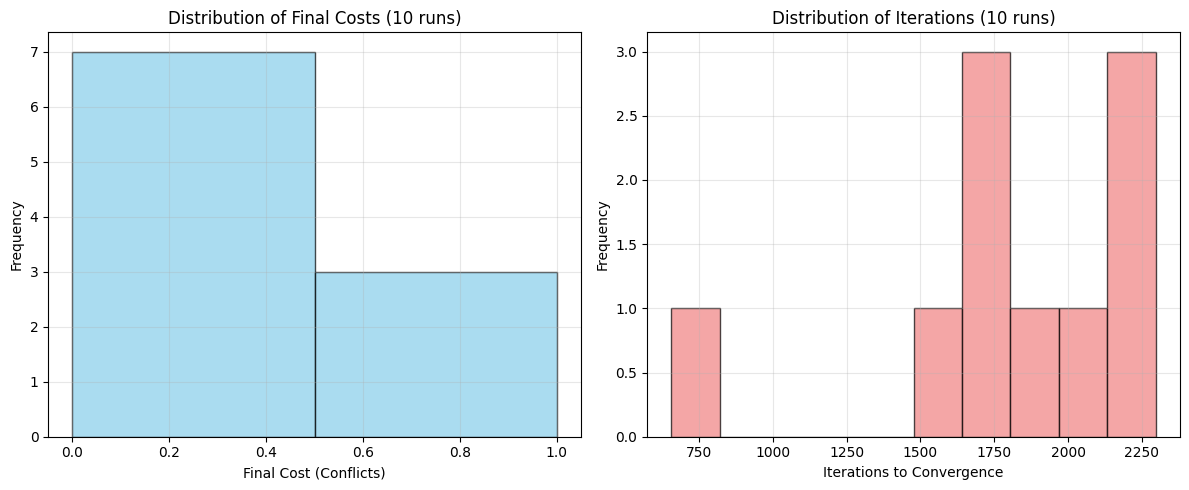

In [8]:
# Multiple runs analysis
def analyze_multiple_runs(num_runs=10):
    """Analyze the consistency of Simulated Annealing across multiple runs."""
    
    print(f"Running Simulated Annealing {num_runs} times...")
    print("-" * 60)
    
    success_count = 0
    costs = []
    iterations_list = []
    
    for run in range(num_runs):
        # Generate a different random initial state for each run
        random_initial = queens_problem.generate_random_state()
        
        sa = SimulatedAnnealing(
            initial_temperature=1000,
            cooling_rate=0.995,
            min_temperature=0.01
        )
        
        sol, cost, hist = sa.solve(queens_problem, random_initial, max_iterations=30000)
        
        if cost == 0:
            success_count += 1
        
        costs.append(cost)
        iterations_list.append(hist['iterations'])
        
        print(f"Run {run+1:2d}: Initial={random_initial} → Cost={cost}, Iterations={hist['iterations']}")
    
    # Calculate statistics
    success_rate = success_count / num_runs * 100
    avg_cost = np.mean(costs)
    avg_iterations = np.mean(iterations_list)
    
    print("\n" + "="*60)
    print("MULTIPLE RUNS ANALYSIS")
    print("="*60)
    print(f"Success rate: {success_count}/{num_runs} ({success_rate:.1f}%)")
    print(f"Average final cost: {avg_cost:.2f}")
    print(f"Average iterations: {avg_iterations:.0f}")
    print(f"Best cost achieved: {min(costs)}")
    print(f"Worst cost achieved: {max(costs)}")
    
    # Visualize results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Cost distribution
    ax1.hist(costs, bins=max(1, len(set(costs))), alpha=0.7, color='skyblue', edgecolor='black')
    ax1.set_xlabel('Final Cost (Conflicts)')
    ax1.set_ylabel('Frequency')
    ax1.set_title(f'Distribution of Final Costs ({num_runs} runs)')
    ax1.grid(True, alpha=0.3)
    
    # Iterations distribution
    ax2.hist(iterations_list, bins=10, alpha=0.7, color='lightcoral', edgecolor='black')
    ax2.set_xlabel('Iterations to Convergence')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'Distribution of Iterations ({num_runs} runs)')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'success_rate': success_rate,
        'costs': costs,
        'iterations': iterations_list
    }

# Run multiple trials
multi_run_results = analyze_multiple_runs(10)

## Conclusion and Key Insights

### Algorithm Performance
The Simulated Annealing algorithm successfully solves the 8-Queens problem by:

1. **Starting with random solutions** and gradually improving them
2. **Accepting worse solutions** early in the search to escape local minima
3. **Becoming more selective** as temperature decreases
4. **Finding optimal or near-optimal solutions** in most runs

### Key Parameters
- **Initial Temperature**: Higher values allow more exploration initially
- **Cooling Rate**: Slower cooling (closer to 1.0) provides better solutions but takes longer
- **Minimum Temperature**: Determines when to stop the search

### Advantages of Simulated Annealing
1. **Escapes local minima** unlike hill climbing
2. **Simple to implement** and understand
3. **Probabilistic acceptance** provides good balance between exploration and exploitation
4. **Works well** for discrete optimization problems like N-Queens

### Limitations
1. **No guarantee** of finding the global optimum
2. **Parameter tuning** required for optimal performance
3. **Computational time** can be significant for large problems
4. **Stochastic nature** means results may vary between runs

The 8-Queens problem demonstrates the effectiveness of Simulated Annealing for combinatorial optimization problems where traditional local search methods might fail.